<a href="https://colab.research.google.com/github/shreshthsk/MLProjects/blob/main/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

 Aadhaar.pdf
 Aaxaasasasxsasaą
 assignment2021.gdoc
 Cengage1-Print-Selected-SDSF.xlsx
'Chi-Square Test.gslides'
 Classroom
'Colab Notebooks'
'Copy of Anime Neon Vibes Marketing Plan by Slidesgo.gslides'
'Copy of Copy of Anime Neon Vibes Marketing Plan by Slidesgo.gslides'
'Copy of SHRESHTH KAUSHAL - August 16, 11:42 PM.gdoc'
 CSAssignment.pdf
 CSTest.pdf
 Data_Structure_UT3.pdf
 Discrete_UT2.pdf
 DOC-20221225-WA0002..pdf
 Drawing.sdr
 DS6A_108_Shreshth_DS6A_2031.pdf
 DS6A-2031_Shreshth_DS6A-109.pdf
 DS6A-2031_Shreshth_NoSQL.docx
 DS6A-2031_Shreshth_Prob_A1.pdf
'DS6A-2031_UT1_Data_Structure (1).pdf'
 DS6A-2031_UT1_Data_Structure.pdf
 DS6A-2031_UT1_Discrete.pdf
'Edited - M_Tech_Shreshth_UT2_CS.pdf'
'End-Sem Examination.pdf'
 End_Sem_OOPS.pdf
'euc-ichy-yoz - Nov 6, 2022.gjam'
'Flowchart .pdf'
'Getting started.pdf'
'Google Keep Document.gdoc'
 IMG_20200819_203424.jpg
 IMG_20210617_141341.jpg
 InternshipProject.mp4
'Kim, Tae - A Guide to Japanese Grammar · A Japanese Approach to Learning 

In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,LabelBinarizer
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

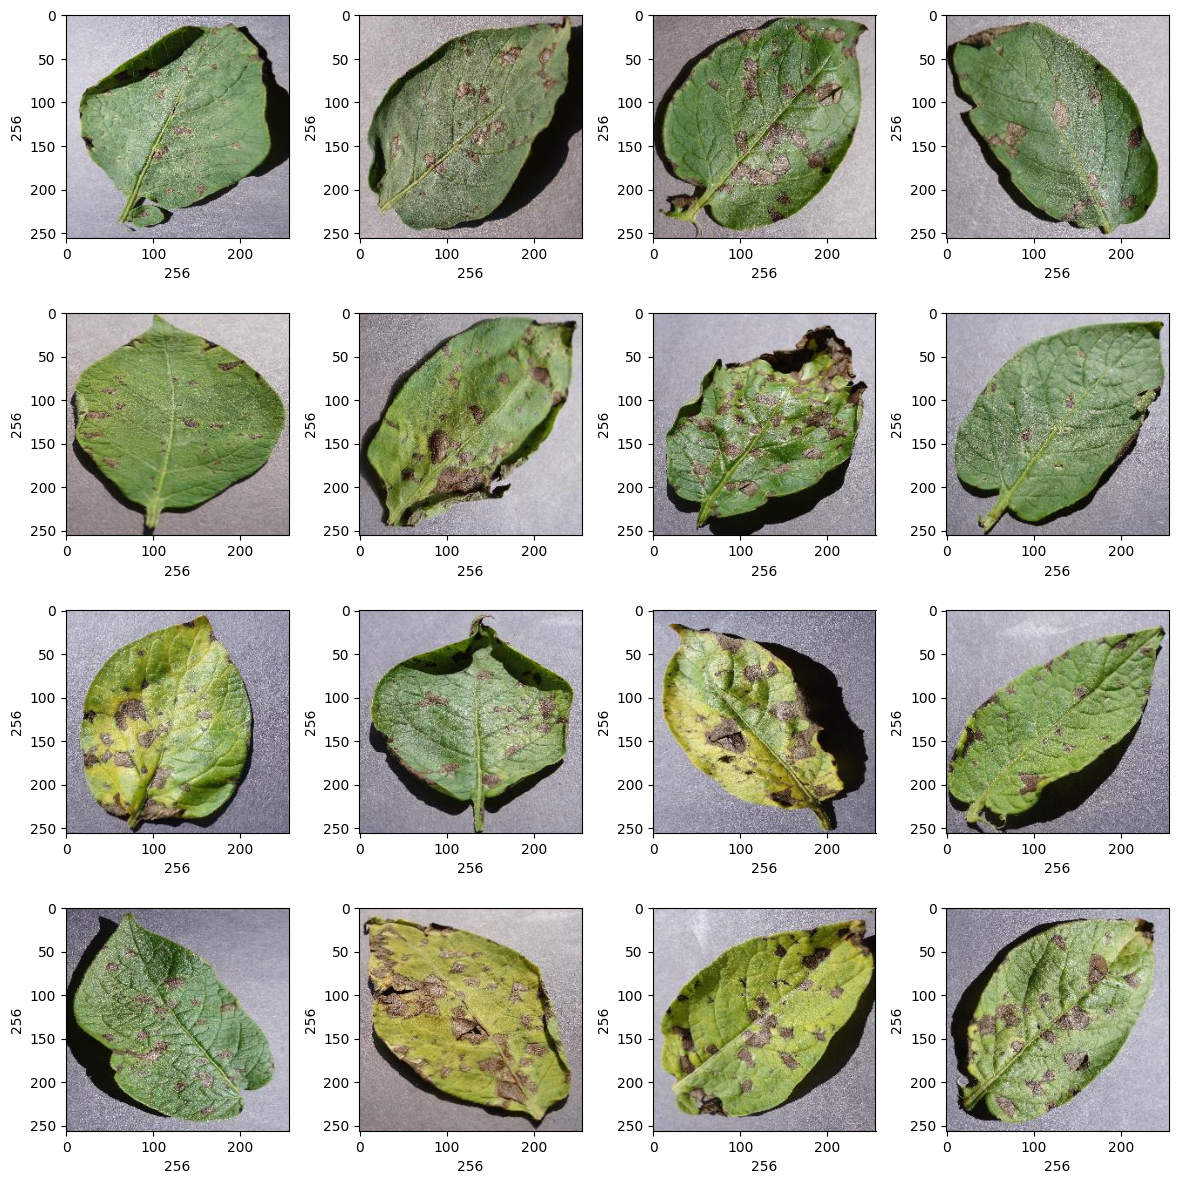

In [4]:
#Visualize
plt.figure(figsize = (12,12))
path = "/content/drive/My Drive/Plant_Data/Potato_early_blight"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + "/"+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1],fontsize = 10)
  plt.ylabel(rand_img.shape[1],fontsize = 10)

In [5]:
#Image to array
def convert_image_to_array(image_dir):
  try:
    image = cv2.imread(image_dir)
    if image is not None:
      image = cv2.resize(image,(256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error: {e}")
    return None

In [6]:
dir = "/content/drive/My Drive/Plant_Data"
root_dir = listdir(dir)
image_list, label_list = [],[]
all_labels = ['Corn-Common-Rust','Potato-Early_Blight','Tomato-Bacterial-Spot']
binary_labels = [0,1,2]
temp = -1

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [7]:
#Check Balanced
labels_counts = pd.DataFrame(label_list).value_counts()
labels_counts.head()

1    310
2    310
0    300
dtype: int64

In [8]:
image_list[0]

array([[[131., 124., 127.],
        [154., 147., 150.],
        [155., 148., 151.],
        ...,
        [193., 188., 190.],
        [168., 163., 165.],
        [151., 146., 148.]],

       [[135., 128., 131.],
        [154., 147., 150.],
        [153., 146., 149.],
        ...,
        [174., 169., 171.],
        [159., 154., 156.],
        [144., 139., 141.]],

       [[145., 138., 141.],
        [157., 150., 153.],
        [153., 146., 149.],
        ...,
        [143., 138., 140.],
        [146., 141., 143.],
        [176., 171., 173.]],

       ...,

       [[191., 180., 183.],
        [190., 179., 182.],
        [188., 177., 180.],
        ...,
        [184., 178., 183.],
        [188., 182., 187.],
        [192., 186., 191.]],

       [[189., 178., 181.],
        [187., 176., 179.],
        [183., 172., 175.],
        ...,
        [182., 176., 181.],
        [186., 180., 185.],
        [190., 184., 189.]],

       [[184., 173., 176.],
        [182., 171., 174.],
        [177., 1

In [9]:
#Shape of the Data
label_list = np.array(label_list)
label_list.shape

(920,)

In [10]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,test_size=0.2,random_state=10)

In [11]:
#Normalizing
x_train = np.array(x_train,dtype = np.float16)/225.0
x_test = np.array(x_test,dtype = np.float16)/225.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [12]:
y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding = "same",input_shape = (256,256,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),padding = "same",input_shape = (256,256,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dense(3,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [14]:
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(0.0001),metrics = ['accuracy'])

In [15]:
#Splitting the training data set into val
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [16]:
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs, validation_data = (x_val,y_val))

Epoch 1/50
5/5 [==============================] - 30s 6s/step - loss: 0.9501 - accuracy: 0.4711 - val_loss: 0.6717 - val_accuracy: 0.6622
Epoch 2/50
5/5 [==============================] - 31s 6s/step - loss: 0.5797 - accuracy: 0.6735 - val_loss: 0.4474 - val_accuracy: 0.9189
Epoch 3/50
5/5 [==============================] - 31s 6s/step - loss: 0.4067 - accuracy: 0.9303 - val_loss: 0.3259 - val_accuracy: 0.9122
Epoch 4/50
5/5 [==============================] - 28s 5s/step - loss: 0.2990 - accuracy: 0.9439 - val_loss: 0.2434 - val_accuracy: 0.9797
Epoch 5/50
5/5 [==============================] - 31s 6s/step - loss: 0.2182 - accuracy: 0.9711 - val_loss: 0.1722 - val_accuracy: 0.9797
Epoch 6/50
5/5 [==============================] - 29s 6s/step - loss: 0.1602 - accuracy: 0.9830 - val_loss: 0.1261 - val_accuracy: 0.9865
Epoch 7/50
5/5 [==============================] - 29s 6s/step - loss: 0.1171 - accuracy: 0.9881 - val_loss: 0.0941 - val_accuracy: 0.9865
Epoch 8/50
5/5 [==================

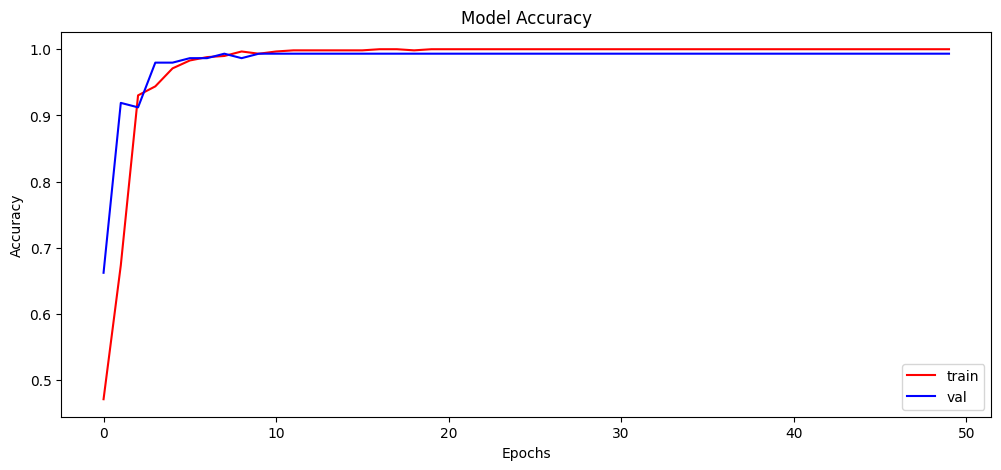

In [17]:
#Plot the training history
plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'],color = 'r')
plt.plot(history.history['val_accuracy'],color= 'b')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [18]:
#MODEL ACCURACY
scores = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 3s 399ms/step - loss: 0.0122 - accuracy: 0.9946
Test Accuracy: 99.45651888847351


In [19]:
y_pred = model.predict(x_test)

6/6 [==============================] - 2s 389ms/step


In [20]:
#Comparing a random label with predicted
print("Original : ",all_labels[np.argmax(y_test[18])])
print("Predicted: ",all_labels[np.argmax(y_pred[18])])

Original :  Corn-Common-Rust
Predicted:  Corn-Common-Rust
